In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [5]:
with open('pyro_bo_test.pkl', 'rb') as f:
    res_dict = pickle.load(f)


In [21]:
mc_y = np.array([res['y'] for res in res_dict['MC']])
rqmc_y = np.array([res['y'] for res in res_dict['RQMC']])

In [19]:
mc_y.shape

(20, 17)

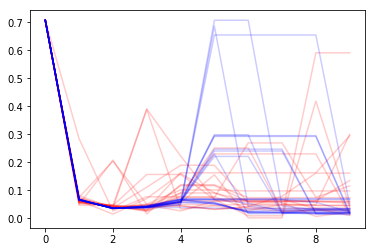

In [26]:
plt.plot(mc_y[:,7:].transpose(),alpha=0.2, color="red" )
plt.plot(rqmc_y[:,7:].transpose(), alpha=0.2, color="blue")

{'boxes': [<matplotlib.lines.Line2D at 0x7f1bca1fb7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1bca23a050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1bca23ab90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1bca23a7d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1bca1fb890>,
  <matplotlib.lines.Line2D at 0x7f1bca220710>]}

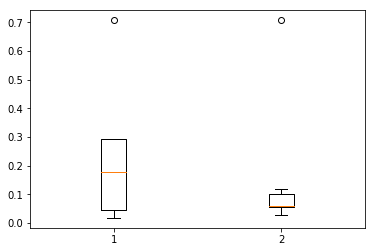

In [33]:
plt.boxplot([rqmc_y[-1,7:], mc_y[-1,7:]])